In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Sintonia para todas as variáveis
# proc_path = '../dist6_data/proc_corr_dist6.csv'
# threshold_path = '../dist6_data/corr_threshold_MultiLoop_mode1_73_dist6.csv'

# # Sintonia para 1, 2, 3, 8, 9 e 21
proc_path = '../dist6_sel_var_data/proc.csv'
threshold_path = '../dist6_sel_var_data/threshold.csv'

In [19]:
proc_df = pd.read_csv(proc_path, index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1, 2, 3, 8, 9, 21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

,xmeas01,xmeas02,xmeas03,xmeas08,xmeas09,xmeas21
tout,,,,,,
2018-03-13 12:13:15.191910,0.271033,3649.739415,4451.320791,64.995825,122.898796,102.480028
2018-03-13 12:13:51.191910,0.000965,3623.428806,4462.360219,64.782059,122.910451,102.463577
2018-03-13 12:14:27.191910,-0.000553,3649.856033,4459.992328,65.640652,122.875696,102.496571
2018-03-13 12:15:03.191910,0.001179,3640.289227,4468.936940,64.547201,122.868379,102.545781
2018-03-13 12:15:39.191910,-0.000089,3654.615228,4444.053549,65.162617,122.863084,102.552682


In [20]:
threshold_df = pd.read_csv(threshold_path, index_col='proc_var')
threshold_df = threshold_df.loc[[1,2,3,8,9,21]]
threshold_df.head(6)

,limit,type,dead_band,delay_time
proc_var,,,,
1,1.017572,HIGH,NaN,NaN
2,3779.733756,HIGH,NaN,NaN
3,4781.169857,HIGH,NaN,NaN
8,66.886473,HIGH,NaN,NaN
9,122.923492,HIGH,NaN,NaN
21,104.130937,HIGH,NaN,NaN


In [31]:
#Analysis for 3sigma method
threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,8,9,21]]


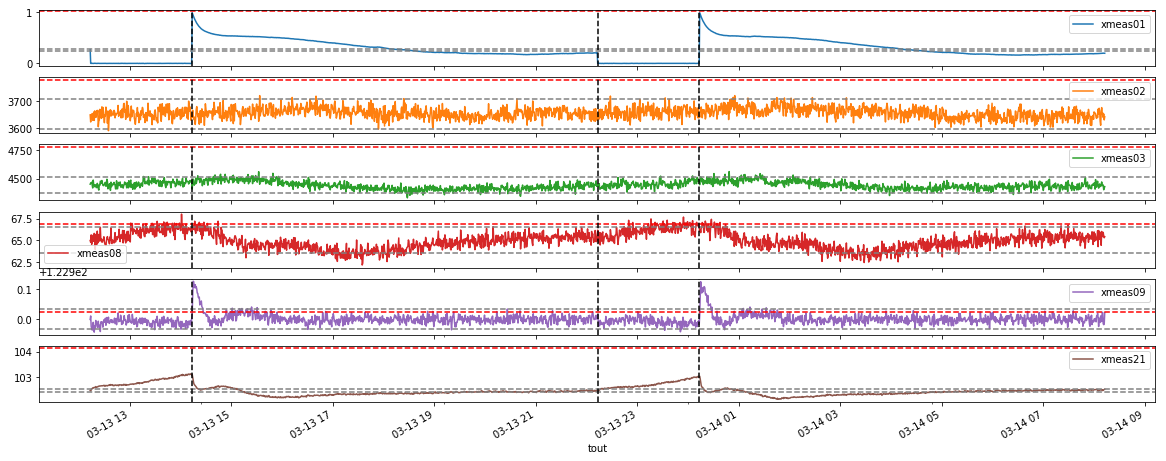

In [30]:
axes = proc_df.iloc[0:2000].plot(subplots=True, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.axhline(y=threshold_df.iloc[i].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2)].limit, color="gray", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
    ax.axvline(x=proc_df.index[200], color="black", ls='--')
    ax.axvline(x=proc_df.index[1000], color="black", ls='--')
    ax.axvline(x=proc_df.index[1200], color="black", ls='--')
plt.show()

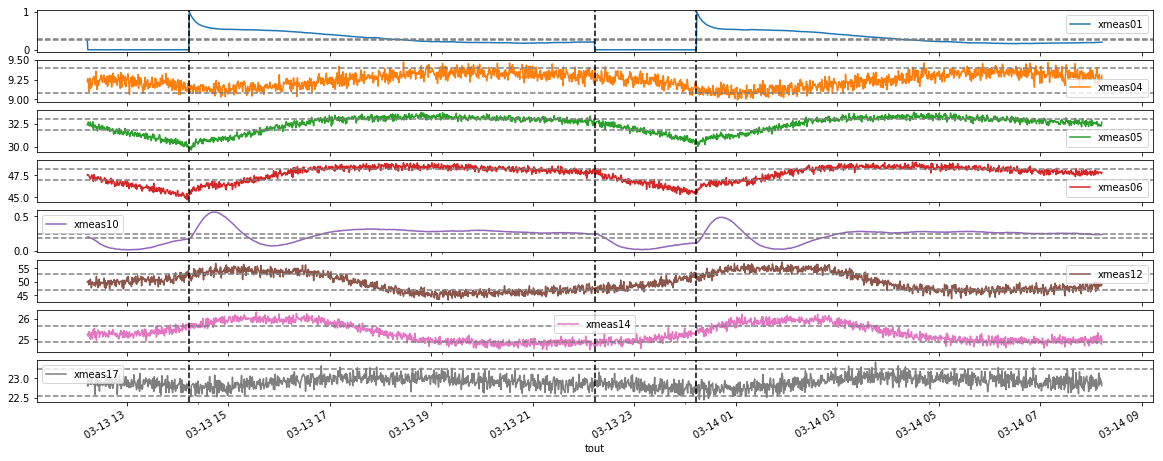

In [34]:
#Plot vars 3sigma method
proc_df = pd.read_csv(proc_path, index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1,4,5,6,10,12,14,17]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
threshold_sigma_df = threshold_sigma_df.loc[[1,4,5,6,10,12,14,17]]

axes = proc_df.iloc[0:2000].plot(subplots=True, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.axhline(y=threshold_sigma_df.iloc[i*(2)].limit, color="gray", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
    ax.axvline(x=proc_df.index[200], color="black", ls='--')
    ax.axvline(x=proc_df.index[1000], color="black", ls='--')
    ax.axvline(x=proc_df.index[1200], color="black", ls='--')
plt.show()